# Лабораторная работа No5.  Выделение признаков символов

## 2. Рассчет признаков

In [214]:
from PIL import Image as pim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [215]:
def calc_black_weight(black_density):
    black_weight = np.sum(black_density)

    return black_weight, black_weight / black_density.size

In [216]:
def calc_black_weights(black_density):
    height, width = black_density.shape
    height_mid = height // 2
    width_mid = width // 2

    black_weights = list()
    norm_black_weights = list()


    top_left = black_density[:height_mid, :width_mid]
    top_right = black_density[:height_mid, width_mid:]
    bottom_left = black_density[height_mid:, :width_mid]
    bottom_right = black_density[height_mid:, width_mid:]

    black_weight, norm_black_weight = calc_black_weight(top_left)
    black_weights.append(black_weight)
    norm_black_weights.append(norm_black_weight)

    black_weight, norm_black_weight = calc_black_weight(top_right)
    black_weights.append(black_weight)
    norm_black_weights.append(norm_black_weight)

    black_weight, norm_black_weight = calc_black_weight(bottom_left)
    black_weights.append(black_weight)
    norm_black_weights.append(norm_black_weight)

    black_weight, norm_black_weight = calc_black_weight(bottom_right)
    black_weights.append(black_weight)
    norm_black_weights.append(norm_black_weight)


    return np.array(black_weights), np.array(norm_black_weights)


In [217]:
def calc_mass_center(black_density, black_weight):
    height, width = black_density.shape

    center_x = float(0)
    center_y = float(0)

    for x in range(height):
        for y in range(width):
            center_x += x * black_density[x][y]
            center_y += y * black_density[x][y]

    return center_x / black_weight, center_y / black_weight

In [218]:
def calc_horizontal_vertical_inertia_moments(black_density, center):
    height, width = black_density.shape
    x_center, y_center = center

    i_x = float(0)
    i_y = float(0)

    for x in range(height):
        for y in range(width):
            i_x += (y - y_center)**2 * black_density[x][y]
            i_y += (x - x_center)**2 * black_density[x][y]

    return i_x, i_y

In [219]:
def calc_profiles(black_density):
    height, width = black_density.shape

    x_profile = np.zeros(height)
    y_profile = np.zeros(width)

    for x in range(height):
        for y in range(width):
            x_profile[x] += black_density[x][y]
            y_profile[y] += black_density[x][y]
    
    return x_profile, y_profile

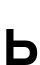

In [220]:
image = pim.open("../1.22/font/ь.png")
image

In [221]:
image_array = np.array(image, dtype=np.uint8)
image_array.shape

(65, 40)

In [222]:
black_density = 1 - image_array / 255

In [223]:
quoter_black_weight, quoter_norm_black_weight = calc_black_weights(black_density)
quoter_black_weight, quoter_norm_black_weight

(array([ 21.48235294,   0.        , 321.01176471, 266.43137255]),
 array([0.03356618, 0.        , 0.48638146, 0.4036839 ]))

In [224]:
black_weight, norm_black_weight = calc_black_weight(black_density)
black_weight, norm_black_weight

(608.9254901960784, 0.2342021116138763)

In [225]:
mass_center = calc_mass_center(black_density, black_weight)
mass_center

(49.811387464901195, 18.678591669028055)

In [226]:
norm_mass_center = (mass_center[0] / (height - 1), mass_center[1] / (width - 1))
norm_mass_center

(0.7663290379215568, 0.4789382479237963)

In [227]:
inertia_moments = calc_horizontal_vertical_inertia_moments(black_density, mass_center)
inertia_moments

(55091.95480167136, 54613.86315562588)

In [228]:
norm_inertia_moments = (
    inertia_moments[0] / (height**2 * width**2),
    inertia_moments[1] / (height**2 * width**2)
)
norm_inertia_moments

(0.007904607840001056, 0.007836011127701142)

In [229]:
x_profile.shape

(66,)

[]

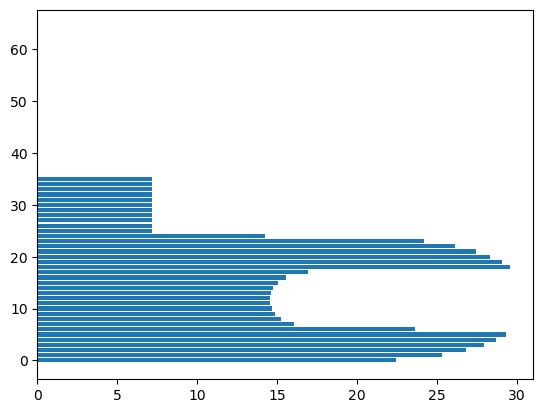

In [230]:
x_profile, y_profile = calc_profiles(black_density)

plt.barh(range(0, x_profile.size), list(reversed(x_profile)))

plt.plot()

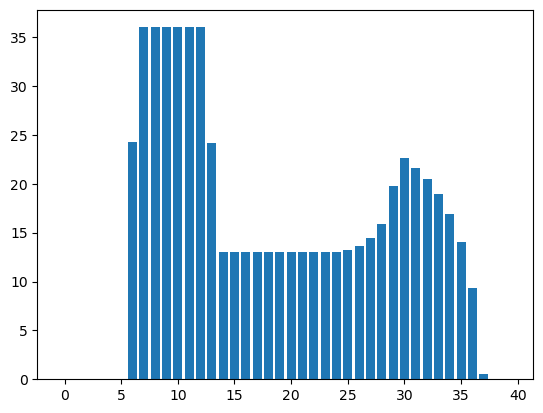

In [235]:
plt.bar(range(y_profile.size), y_profile)
plt.show()

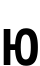

In [ ]:
image

In [ ]:
pd.DataFrame(index=["a", "b"])

""
a
b
